# HOMEWORK 3

## Read the data

We will read dataset that is about the Simmons stores. The data contains following information.

    1.UsesCoupon: Whether a customer uses a coupon provided by the stores.
    2.HasCard: Whether the customer has a store card or not.
    3.Spends: The total amount spent by the customer in the last year in the unit of $1000.
    4.Customer: The id of the customer.

In [3]:
options(warn=-1)
storeData <- read.csv('simmons.csv')

### Inspect the data read

In [6]:
head(storeData)

Customer,HasCard,Spends,UsesCoupon
1,0,8.5815985,1
2,0,1.4640473,0
3,0,3.4647250,0
4,1,0.8019791,1
5,0,9.9601634,1
6,1,7.9306165,1


#### Spends are already reduced in given data.

In [7]:
cat("Size of Store data",dim.data.frame(storeData))

Size of Store data 1000 4

## Question 1 - Fit a logistic regression model with the UsesCoupon as the response and other variables Spends and HasCard as potential predictors using gradient descent.

##### Form the data matrix

In [218]:
y <- as.matrix(storeData$UsesCoupon)
colnames(y) <- c("UsesCoupon")
ones <- matrix(rep(1,nrow(y)), nrow = nrow(y), ncol = 1)
# data matrix
A <- cbind(ones,storeData$HasCard,storeData$Spends)
colnames(A) <- c("Ones","HasCard","Spends")
head(y)
head(A)

UsesCoupon
1
0
0
1
1
1


Ones,HasCard,Spends
1,0,8.5815985
1,0,1.4640473
1,0,3.4647250
1,1,0.8019791
1,0,9.9601634
1,1,7.9306165


#####  Modelling the success probability as
$\hat{y} = \sigma(Ax) \enspace  \text{where} \enspace  \sigma{(z)} = \Large\frac{e^{z}}{(1 + e^{z})} $  

In [72]:
# A is the data mtrix of dimension 1000 x 3 and x is the coffiecient matrix of dimension 3 x 1.
# This function will return will return matric of dimension with 1000 x 1 with yi = sigmoid(Aixi)
sigmoid <- function(x,A){
    Ax <- A %*% x
    yhat <- apply(Ax,1, function (var) exp(var)/(1 + exp(var)))
    yhat <- as.matrix(yhat)
    colnames(yhat) <- c("Predicted_UsesCoupon")              
    return (yhat)
}

#####  Calculating gradient

In [161]:
# A is the data mtrix of dimension 1000 x 3, y is the output matrix of dimension 1000 x 1,
# yhat is the predicted output matrix of dimension 1000 x 1
# This function will compute and return will gradient matrix with dim 3 x 1
gradient <- function(A,y,yhat){
    N <- length(y)
    deltafx = matrix(rep(0,ncol(A)), nrow = ncol(A), ncol = 1)
    for(j in seq(nrow(deltafx))){
        sum <- 0
        for(i in seq(nrow(A))){
            temp <- (yhat[i] - y[i]) * A[i,j]
            sum <- sum + temp
        }
        deltafx[j] <- sum/N
    }
    rownames(deltafx) <- c("deltafx1", "deltafx2", "deltafx3")
    return (deltafx)
}

#### Defination of function for gradient descent

In [176]:
# A is the data mtrix of dimension 1000 x 3, y is the output matrix of dimension 1000 x 1,
# alpha is the learnig rate,  thres is the threshold for gradient norm for stopping, mxi is maximum iterations
# This function do gradient descent and give optimimum cofficients
gradientDescent <- function(y,A,x,alpha,thrs,maxi){
    converged<-FALSE
    i<-1
    x1<-x
     while((!converged  && i <= maxi))
            {
                yhat <-  sigmoid(x1,A)
                deltafx <- gradient(A,y,yhat)
                if(is.infinite(deltafx) || is.nan(norm(deltafx,type = "2"))){
                    break
                }
                x1 <- x1 - (alpha*deltafx)
                converged <- (norm(deltafx,type = "2") <= thrs)
                i <- i+1
            }

    return (list("x1"= x1,"iteration" = i-1,"converged" = converged))
}


In [177]:
#running gradient descent on data with different learning rate
alphas <- c(10,5.0,1,0.5,0.1,0.01)
thres <- 10**(-2)
maxiter <- 10000
successalphs <- c()
iternations <- list()
xsfull <- list()
x = matrix(rep(0,ncol(A)), nrow = ncol(A), ncol = 1)
rownames(x) <- c("x1", "x2", "x3")
row = 1
for (alpha in alphas) {
    answer <- gradientDescent(y,A,x,alpha,thres,maxiter)
        if (answer$converged){
        successalphs <- append(successalphs,alpha)
        xsfull[[row]] <- answer$x
        iternations[[row]] <- answer$iteration
        row = row+1
    }
    }
successalphs <- format(successalphs, scientific = FALSE)
xsfull <- do.call(cbind, xsfull)
iternations <- do.call(cbind, iternations)

colnames(xsfull)<- successalphs
colnames(iternations)<- successalphs
modifiedxs <- format(xsfull, scientific = FALSE)
modifiedxs
iternations
successalphs

,10.0,5.0,1.0,0.5,0.1
x1,-15.367439,-8.479330,-4.929665,-4.925239,-4.920445
x2,17.255413,10.574735,6.568382,6.562942,6.557031
x3,3.758761,2.140135,1.284105,1.283100,1.282012


10.0,5.0,1.0,0.5,0.1
105,150,339,679,3394


[1] "10.0" " 5.0" " 1.0" " 0.5" " 0.1"

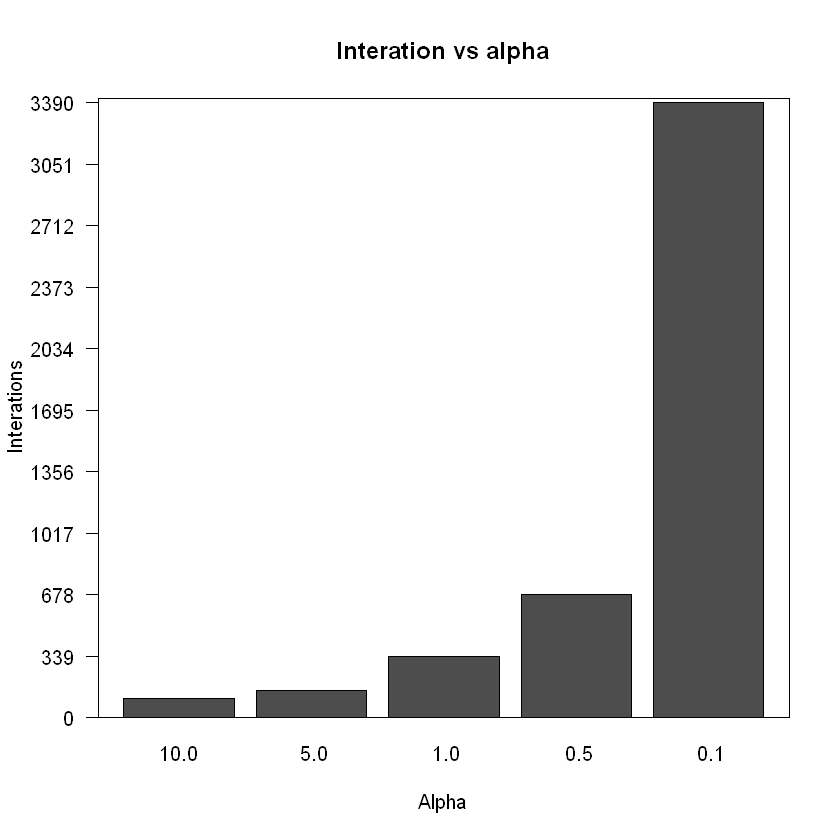

In [178]:
barplot(iternations, main="Interation vs alpha", names.arg = successalphs,
        ylab = "Interations", ylim = c(0,max(iternations)+20), xlab = "Alpha", axes = FALSE)
ylabel <- seq(0, max(iternations)+20, by = max(iternations)%/%10)
axis(2, at = ylabel, las = 1)
box()

In [179]:
# selecting cofficients for learning rate 0.5 
optimumx <- as.matrix(xsfull[,3])
optimumx

x1,-4.929665
x2,6.568382
x3,1.284105


## Question 2 - Predict the probiblities of using coupons for given data

In [180]:
annualSpending <- c(1000,2000,3000,4000,5000,6000,7000)
# diving spending by 1000 to get smaller values
annualSpendingR <- annualSpending/1000
ones <- rep(1,length(annualSpendingR))

HasCardYes <- rep(1,length(annualSpendingR))
HasCardNo <- rep(0,length(annualSpendingR))

dataMatrixYes <- cbind(ones,HasCardYes,annualSpendingR)
dataMatrixNo <- cbind(ones,HasCardNo,annualSpendingR)

In [181]:
yhatYes <- sigmoid(x = optimumx,A = dataMatrixYes)
yhatNo <- sigmoid(x = optimumx,A = dataMatrixNo)

In [182]:
PredictionTable <- cbind(annualSpending,yhatYes,yhatNo)
colnames(PredictionTable) <- c("Annual Spending","Credit Card Yes", "Credit Card No")  

In [183]:
PredictionTable

Annual Spending,Credit Card Yes,Credit Card No
1000,0.9489631,0.02544255
2000,0.9853265,0.08615953
3000,0.9958933,0.25400773
4000,0.9988595,0.55150524
5000,0.9996839,0.81620721
6000,0.9999125,0.94130784
7000,0.9999758,0.98302794


## Question 3 - Comment on a marketing strategy based on the table above for maximizing the number of customers using your store coupons.

#### Using above table as reference, as CEO I can have two strategies
##### 1. I can encourage the customers without store card and with annual spending less than \$6000 to enroll for store credit card.

This on the basis of observation that the customers with store card use coupons with high probability irrespective of annual spending.
      
##### 2. I can encourage the customers to increase their annual spening in my stores.

This on the basis of observation that the customers with annual speding more than \$6000 use coupons with high probability irrespective of store card.  

## Question 4 - Implement Polyak's momentum method to solve the logistic regression problem.

In [197]:
# A is the data mtrix of dimension 1000 x 3, y is the output matrix of dimension 1000 x 1,
# alpha is the learnig rate,  thres is the threshold for gradient norm for stopping, mxi is maximum iterations
# This function do gradient descent and give optimimum cofficients
polyakMomentum <- function(y,A,x,alpha,beta,thrs,maxi) {
    converged<-FALSE
    i <- 1
    x1 <- x
    Z <- matrix(rep(0,ncol(A)), nrow = ncol(A), ncol = 1)
     while((!converged  && i <= maxi))
            {
                yhat <-  sigmoid(x1,A)
                deltafx <- gradient(A,y,yhat)
                if(is.infinite(deltafx) ||is.nan(deltafx) || is.nan(norm(deltafx,type = "2"))){
                    break
                }
                # polyakMomentum 
                Z <- beta*Z + deltafx
                x1 <- x1 - (alpha*Z)
                converged <- (norm(deltafx,type = "2") <= thrs)
                i <- i+1
            }

    return (list("x1"= x1,"iteration" = i-1,"converged" = converged))
}

In [202]:
betas <- c(0.1,0.3,0.5,0.7,0.9,1)
alpha <- 0.5
thres <- 10**(-2)
maxiter <- 10000
successbetas <- c()
iternations <- list()
xsfull <- list()
x = matrix(rep(0,ncol(A)), nrow = ncol(A), ncol = 1)
rownames(x) <- c("x1", "x2", "x3")
row = 1
for (beta in betas) {
    answer <- polyakMomentum(y,A,x,alpha,beta,thres,maxiter)
        if (answer$converged){
        successbetas <- append(successbetas,beta)
        xsfull[[row]] <- answer$x
        iternations[[row]] <- answer$iteration
        row = row+1
    }
    }
successbetas <- format(successbetas, scientific = FALSE)
xsfull <- do.call(cbind, xsfull)
iternations <- do.call(cbind, iternations)

colnames(xsfull)<- successbetas
colnames(iternations)<- successbetas
modifiedxs <- format(xsfull, scientific = FALSE)
modifiedxs
iternations
successbetas

,0.1,0.3,0.5,0.7,0.9,1.0
x1,-4.926078,-4.924722,-4.931246,-4.931343,-6.540701,-28.411975
x2,6.563981,6.562334,6.570435,6.570860,8.533689,34.507292
x3,1.283290,1.282982,1.284462,1.284480,1.733906,6.684101


0.1,0.3,0.5,0.7,0.9,1.0
611,474,338,199,60,61


[1] "0.1" "0.3" "0.5" "0.7" "0.9" "1.0"

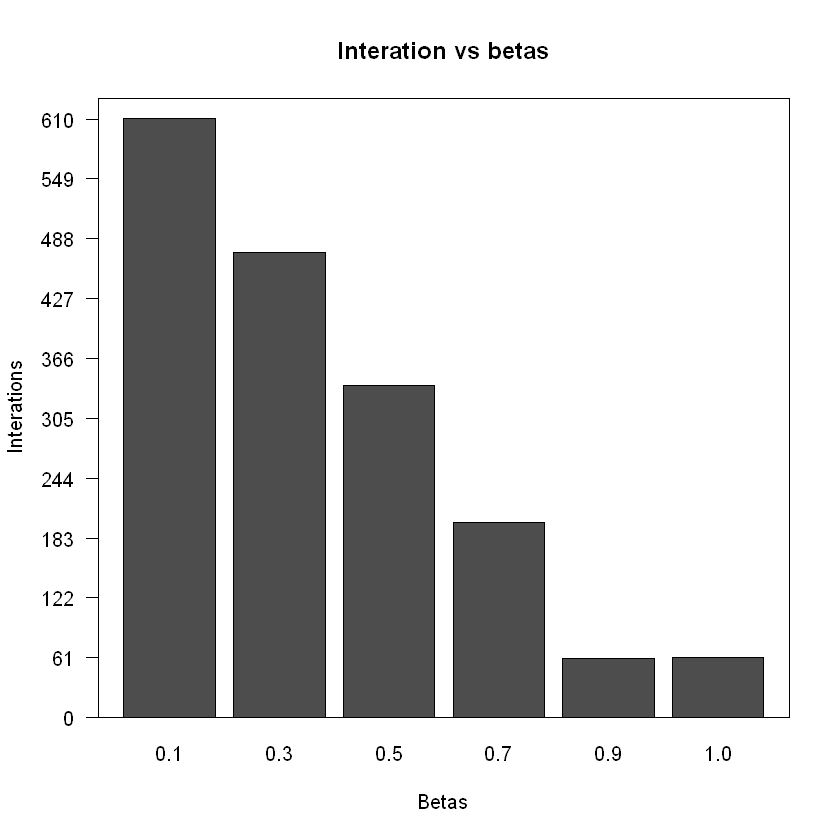

In [203]:
barplot(iternations, main="Interation vs betas", names.arg = successbetas,
        ylab = "Interations", ylim = c(0,max(iternations)+20), xlab = "Betas", axes = FALSE)
ylabel <- seq(0, max(iternations)+20, by = max(iternations)%/%10)
axis(2, at = ylabel, las = 1)
box()

#### Observation for using Polyak's momentum method

There is vast improvement in the alogorithm by using Polyaks Moemtum method. For same alphas number of iteration is reduced to as low as 60 for beta = 0.9. Also we can observe that with beta = 0.9 the cofficients are some what different than with other betas. And as beta>=1 number of iternation increases. I tested for beta  = 1.5 and 2 also for these betas there was no convergenvce.

To verify my coffiecients I did same problem using "glm" modelling(shown below). But coffiecients I got for "glm" are way too different than coffiecients I got. Is there any specific reason or my implementation is wrong ?

In [223]:
head(storeData)

Customer,HasCard,Spends,UsesCoupon
1,0,8.5815985,1
2,0,1.4640473,0
3,0,3.4647250,0
4,1,0.8019791,1
5,0,9.9601634,1
6,1,7.9306165,1


In [224]:
logitMod <- glm(UsesCoupon ~ HasCard + Spends, data = storeData, family = binomial(link = "logit"))
coef(logitMod)

(Intercept)     HasCard      Spends 
  -1792.181    1794.910     439.860

Github link for the code 

https://github.com/jainsanyam786/OptimizationForMachineLearning.git